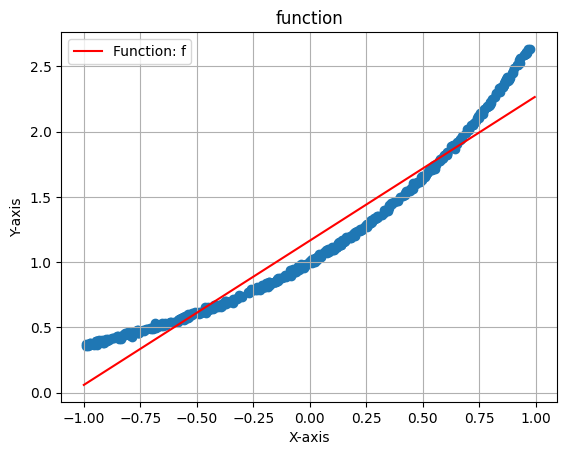

for a linear regression, this seems pretty good !


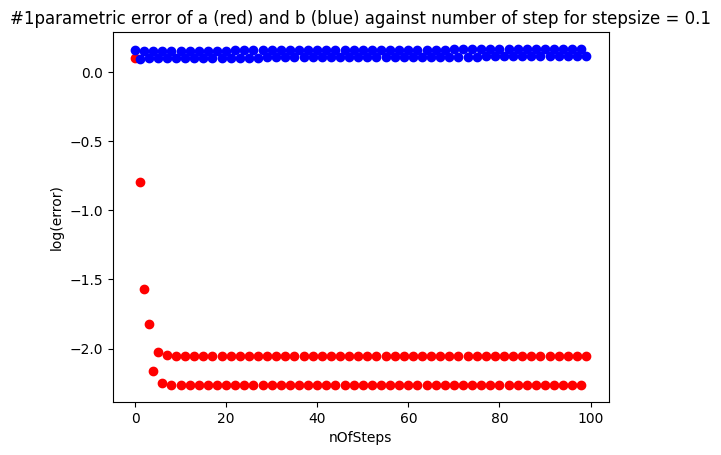

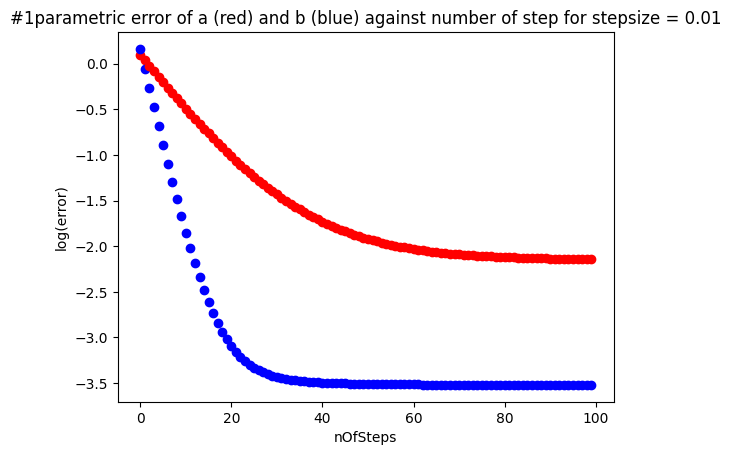

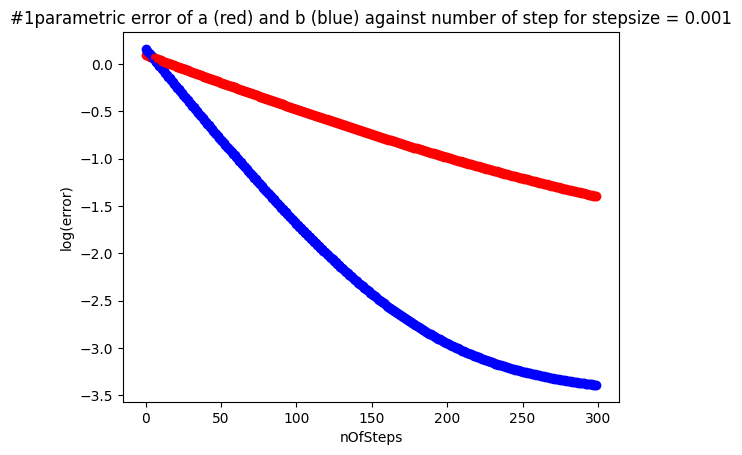

As we can see, the smaller our stepsize, the longuest it takes for the regression to converge.
However, if the step size is too big (n>=1), our result jump around the optimal solution a lot, and is
a lot less precize. n = 0.1 seems to have the best balance between speed and precision.


In [1]:
#Zachary Bédard
#261113611


"""1. Implement the linear regression f (x) = ax + b. Choose the target function F to be
F (x) = exp x,
and train it by the plain gradient descent. The exact values of the regression parameters (a, b) can
be found by simple linear algebra, which can then be subtracted from the gradient descent steps
(an, bn) to compute the parametric error. Plot the parametric error, the training loss, as well as the
test loss against the number of gradient descent steps for different values of the stepsize η (or the
learning rate). Make a contour plot of the training loss as a function of (a, b) and depict the path
of the gradient descent algorithm for different values of the learning rate and for different initial
Date: Fall 2023.
1
2 DUE WEDNESDAY NOVEMBER 29, 22:00 EST
values (a0, b0). Perform experiments to see how the size of the training data set affects the quality
of the regression.
"""


import math
import random 
import matplotlib.pyplot as plt
import numpy as np


def least_square(F, data) :

    least_square = 0
    
    for point in data : 

        x = point[0]
        y = point[1]

        least_square += ((F(x) - y) ** 2)

    return least_square

        

def F(x) :
    return math.exp(x)

def training_data_set(F, N, stdev=1): # used to create a training data set of size N, with function F
    set = []

    while (len(set) < N) :

        x = random.uniform(-1, 1)
        y = F(x)

        #set.append((x,y + np.random.normal(x, 0.01)))
        set.append((x,y + np.random.normal(0,stdev))) # error will be normally distributed.
    return set


def test_data_set(F,N):
    return training_data_set(F, N/4)

class Linear_regression:

    def __init__(self, parameters) : #f(x) = ax+b

        self.parameters = parameters

    def f(self, x) :

        a = self.parameters[0]
        b = self.parameters[1]

        return a * x + b

def eval_gradient_least_square_linear(data, linReg_parameters):
    grad_a = 0
    grad_b = 0
    for point in data:
        x = point[0]
        y = point[1]
        grad_a += 2 * (linReg_parameters[0] * x + linReg_parameters[1] - y) * x # derivative of (ax+b - y)^2 wrt a is 2(ax+b)*x
        grad_b += 2 * (linReg_parameters[0] * x + linReg_parameters[1] - y) # # derivative of (ax+b - y)^2 wrt b is 2(ax+b)*1
    return [grad_a / len(data), grad_b / len(data)] # should we divide by len(data) ? 

def train_my_linear_regression(nb_epoch, data,learning_rate,linReg):

    for n in range(nb_epoch) :
        parameter_gradient = eval_gradient_least_square_linear(data,linReg.parameters )
        linReg.parameters[0] = linReg.parameters[0] - learning_rate * parameter_gradient[0] # a = a - n * (gradient of F with respect to a)
        linReg.parameters[1] = linReg.parameters[1] - learning_rate * parameter_gradient[1] # b = b - n * (gradient of F with respect to b)


def plotpoints(data):
    x_values = []
    y_values = []
    for elmt in data :
        x_values.append(elmt[0])
        y_values.append(elmt[1])
    
    # Plot points
   
    plt.scatter(x_values, y_values)
    plt.title('linear regression')  # Set the title of the plot
    plt.xlabel('X') 
    plt.ylabel('Y') 

def plot_function(f, x0,xn, n, title="function"):

    step_size = (xn - x0)/n
    x = x0
    x_values = []
    y_values = []

    while x < xn : 
        x_values.append(x)
        y_values.append(f(x))
        x += step_size
    
    plt.plot(x_values, y_values, label="Function: " + f.__name__, color="red")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

my_training_data_set = training_data_set(F,500, 0.01)

plotpoints(my_training_data_set)
myLinreg = Linear_regression([0,0])
train_my_linear_regression(500,my_training_data_set,0.1, myLinreg)
plot_function(myLinreg.f, -1,1,500)

print("for a linear regression, this seems pretty good !")

# we need to plot the parametric error (error of the parameters) against the number of steps for differents n
# lets find the true value that our parameters a,b should have for the best possible least square linear approximation of
# e^x

# minimize the integral from -1 to 1 of (e^x - ax+b)^2

# the integral gives : (e^(-2)*(12*e^2*b^2+(12*e-12*e^3)*b+4*e^2*a^2-24*e*a+3*e^4-3))/6 (found with an online calculator)
# derivative with respect to a : (e^(-1)*(4*e*a-12))/3 = 0 <=> a = 3/e
# derivative with respect to b: e^(-1)*(4*e*b-2*e^2+2) = 0 <=> b = (e^2-1)/(2e)


my_training_data_set = training_data_set(F,500) # the set we try to approximate
 

n = 1


for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    error_of_a = math.log(abs(myLinreg.parameters[0] - 3/math.exp(1)))
    error_of_b = math.log(abs(myLinreg.parameters[1] - (math.exp(1) ** 2 -1)/(2 * math.exp(1) )))
    
 
    plt.scatter([nOfSteps], [error_of_a], color="red")
    plt.scatter([nOfSteps], [error_of_b], color="blue")


plt.title('#1parametric error of a (red) and b (blue) against number of step for stepsize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



n = 0.1

for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    error_of_a = math.log(abs(myLinreg.parameters[0] - 3/math.exp(1)))
    error_of_b = math.log(abs(myLinreg.parameters[1] - (math.exp(1) ** 2 -1)/(2 * math.exp(1) )))
    
    plt.scatter([nOfSteps], [error_of_a], color="red")
    plt.scatter([nOfSteps], [error_of_b], color="blue")
    
plt.title('#1parametric error of a (red) and b (blue) against number of step for stepsize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


n = 0.01

for nOfSteps in range(300) :

    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    error_of_a = math.log(abs(myLinreg.parameters[0] - 3/math.exp(1)))
    error_of_b = math.log(abs(myLinreg.parameters[1] - (math.exp(1) ** 2 -1)/(2 * math.exp(1) )))
    
    plt.scatter([nOfSteps], [error_of_a], color="red")
    plt.scatter([nOfSteps], [error_of_b], color="blue")

plt.title('#1parametric error of a (red) and b (blue) against number of step for stepsize = 0.001')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

#print(myLinreg.parameters)

plt.show()

print("As we can see, the smaller our stepsize, the longuest it takes for the regression to converge.")
print("However, if the step size is too big (n>=1), our result jump around the optimal solution a lot, and is")
print("a lot less precize. n = 0.1 seems to have the best balance between speed and precision.")

# the rest of the question is in the next cell, for clarity



    

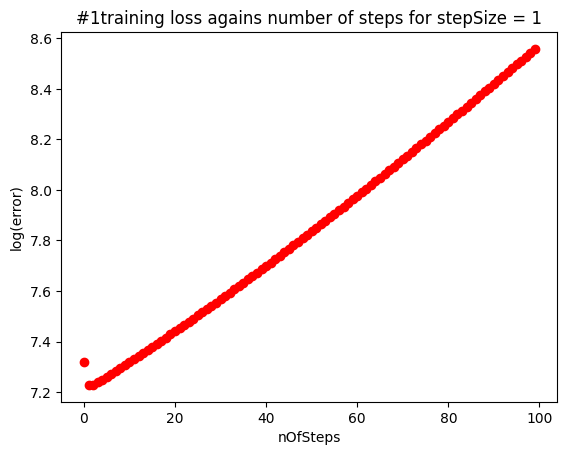

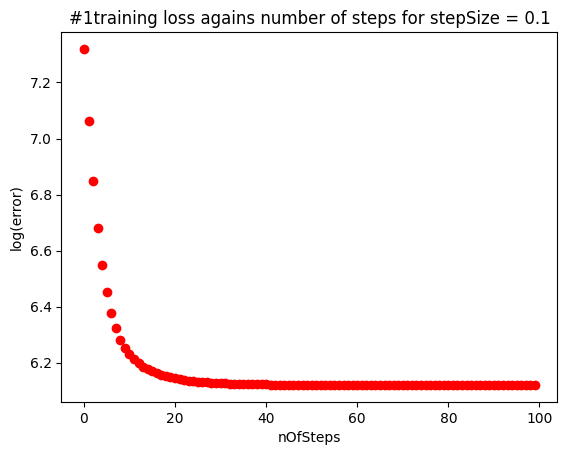

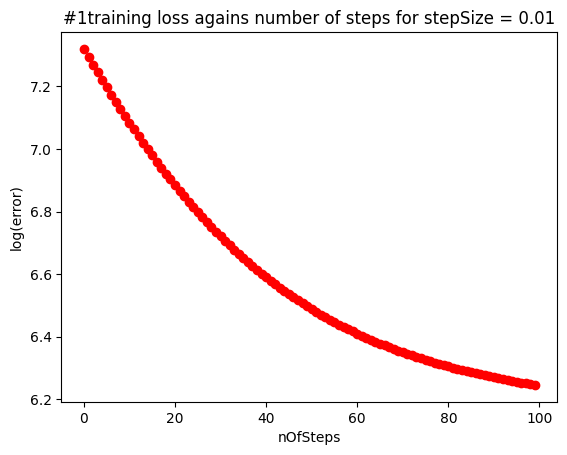

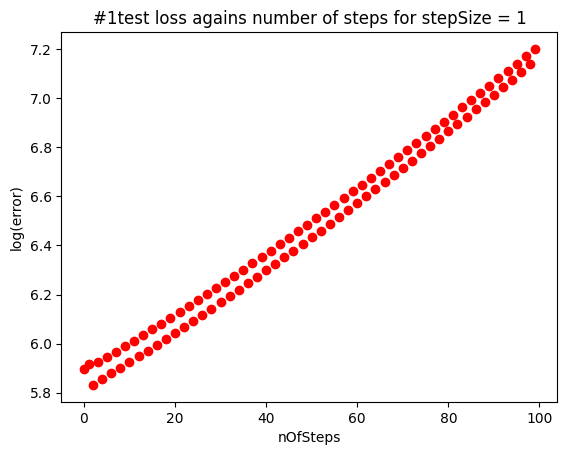

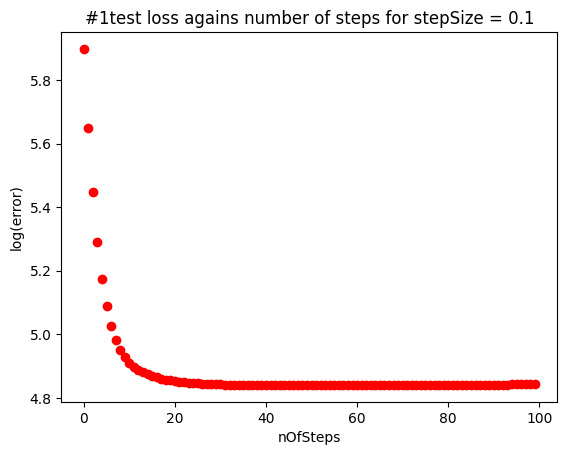

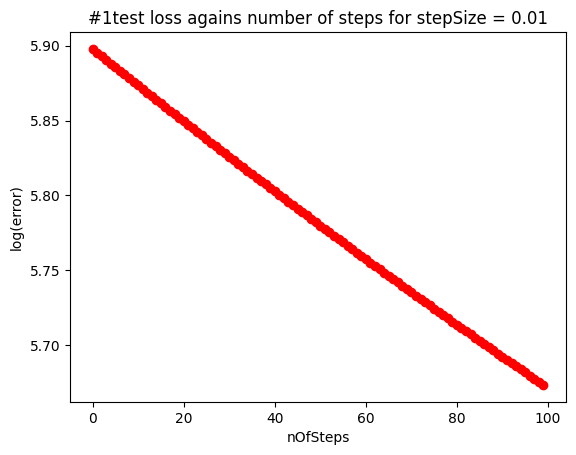

as we can see, both training as test loss converges to small values when n < 1


In [2]:
#TODO : Plot the training loss, : least_square(F, data) data -> training set. 

my_training_data_set = training_data_set(F,500) # the set we try to approximate
my_test_dada_set = test_data_set(F,500) # test data set, 1/4 of the size of the training one


n = 1


for nOfSteps in range(100) :
    myLinreg = Linear_regression([0,0]) 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    training_loss = math.log(least_square(myLinreg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#1training loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



n = 0.1


for nOfSteps in range(100) :
    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    training_loss = math.log(least_square(myLinreg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#1training loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.01


for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    training_loss = math.log(least_square(myLinreg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#1training loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



# test loss

n = 1


for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    test_loss = math.log(least_square(myLinreg.f, my_test_dada_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#1test loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


n = 0.1


for nOfSteps in range(100) :
    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare 

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    test_loss = math.log(least_square(myLinreg.f, my_test_dada_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#1test loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


 
n = 0.001


for nOfSteps in range(100) :
    myLinreg = Linear_regression([0,0]) # we always start with y = 0x + 0 to compare

    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)

    test_loss = math.log(least_square(myLinreg.f, my_test_dada_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#1test loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()

print("as we can see, both training as test loss converges to small values when n < 1")


#TODO : Plot the test loss,
#TODO : Make a contour plot of the training loss as a function of (a, b)
#TODO : depict the path of the gradient descent algorithm for different values of the learning rate and for different initial 
#       values (a0, b0).
#TODO : Perform experiments to see how the size of the training data set affects the quality of the regression.


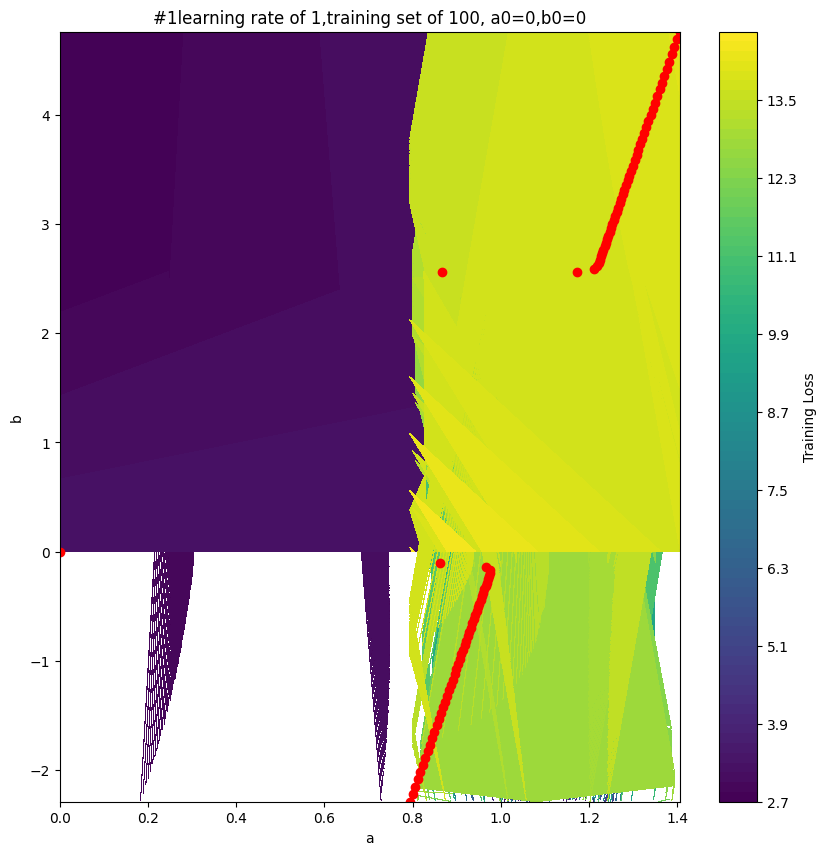

as we can see, if we make n>=1, it really does not like that
the result can however be quite artistic somemimes


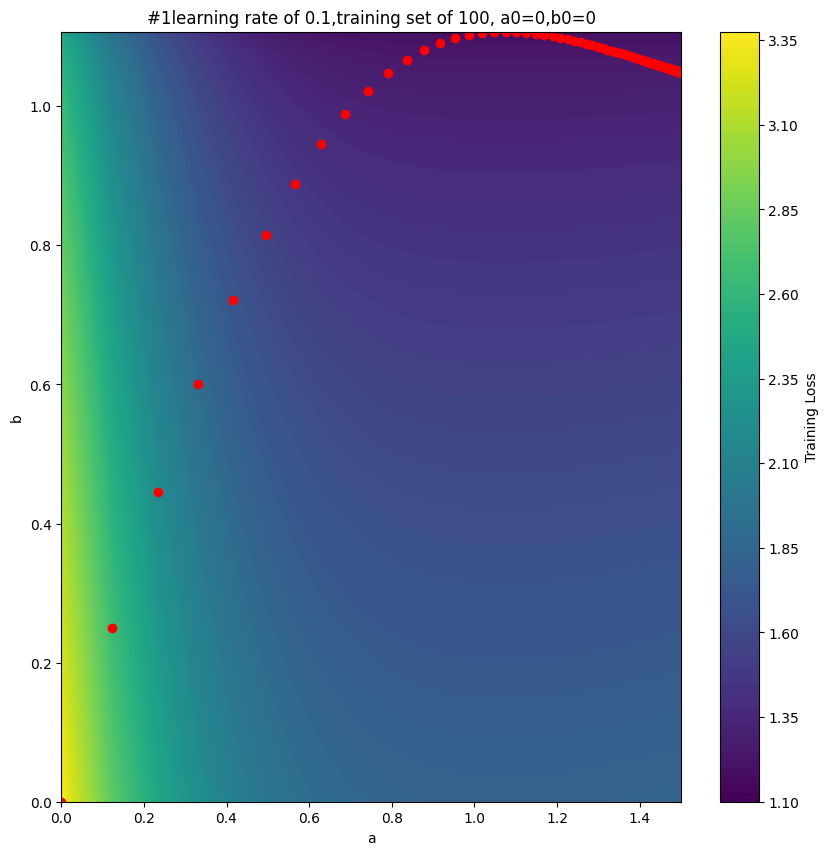

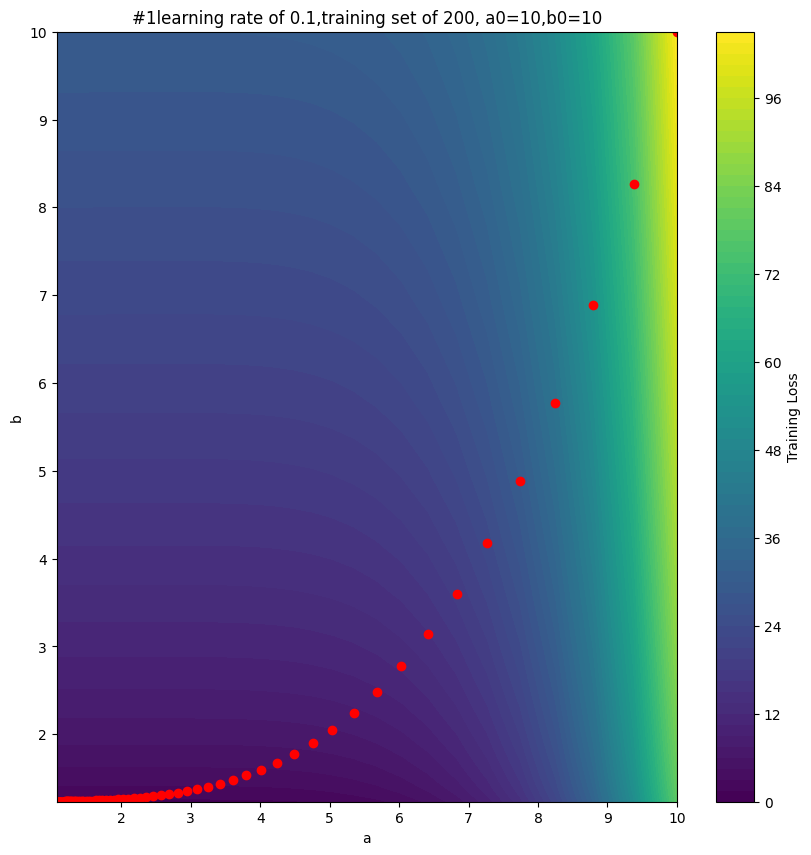

note, in the one above, the points actually go from the topright corner, to the botomleft


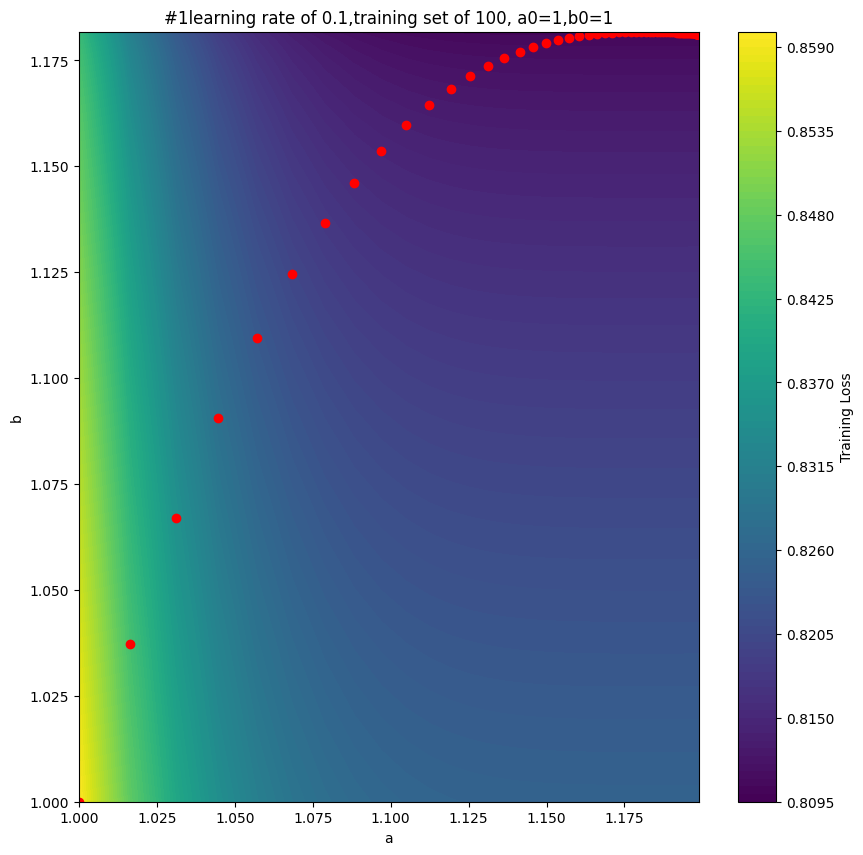

In [4]:
#Make a contour plot of the training loss as a function of (a, b) and depict the path
#of the gradient descent algorithm for different values of the learning rate and for different initial
#values (a0, b0). Perform experiments to see how the size of the training data set affects the quality
#of the regression.

def compute_training_loss(a, b, x_train, y_train):

    y_pred = [a * x + b for x in x_train]
    loss = sum((y_pred[i] - y_train[i]) ** 2 for i in range(len(y_train))) / len(y_train)
    return loss

# Compute training loss for each combination of a and b

def get_loss_values(a_values,b_values,x_train,y_train):

    loss_values = []
    for a in a_values:
        row_losses = []
        for b in b_values:
            loss = compute_training_loss(a, b, x_train, y_train)
            row_losses.append(loss)
        loss_values.append(row_losses)
    return loss_values

# Plot contour of the training loss

def plot_contour(a_values, b_values, loss_values, title) :

    plt.figure(figsize=(10, 10))
    plt.contourf(a_values, b_values, loss_values, levels=100)
    plt.colorbar(label='Training Loss')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(title)

    for i in range(len(a_values)) :

        a = a_values[i]
        b = b_values[i]
        plt.plot(a,b,"ro")
        
        #print(a)
        #print(b)

    
    plt.show()


my_training_data_set = training_data_set(F,100) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) 
    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLinreg.parameters[0])
    b_value.append(myLinreg.parameters[1])


loss_values = get_loss_values(a_value,b_value,x_train,y_train)
plot_contour(a_value, b_value, loss_values, "#1learning rate of 1,training set of 100, a0=0,b0=0")

print("as we can see, if we make n>=1, it really does not like that")
print("the result can however be quite artistic somemimes")





my_training_data_set = training_data_set(F,100) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLinreg = Linear_regression([0,0]) 
    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLinreg.parameters[0])
    b_value.append(myLinreg.parameters[1])


loss_values = get_loss_values(a_value,b_value,x_train,y_train)
plot_contour(a_value, b_value, loss_values, "#1learning rate of 0.1,training set of 100, a0=0,b0=0")



my_training_data_set = training_data_set(F,200) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLinreg = Linear_regression([10,10]) 
    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLinreg.parameters[0])
    b_value.append(myLinreg.parameters[1])


loss_values = get_loss_values(a_value,b_value,x_train,y_train)
plot_contour(a_value, b_value, loss_values, "#1learning rate of 0.1,training set of 200, a0=10,b0=10")

print("note, in the one above, the points actually go from the topright corner, to the botomleft")


my_training_data_set = training_data_set(F,200) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLinreg = Linear_regression([1,1]) 
    train_my_linear_regression(nOfSteps,my_training_data_set,n, myLinreg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLinreg.parameters[0])
    b_value.append(myLinreg.parameters[1])


loss_values = get_loss_values(a_value,b_value,x_train,y_train)
plot_contour(a_value, b_value, loss_values, "#1learning rate of 0.1,training set of 100, a0=1,b0=1")




# Perform gradient descent from different initial points for different learning rates
# Plot the paths taken by the gradient descent algorithm on the contour plot

# Example:
# For each (a0, b0) and learning rate η:
# Perform gradient descent and plot the path




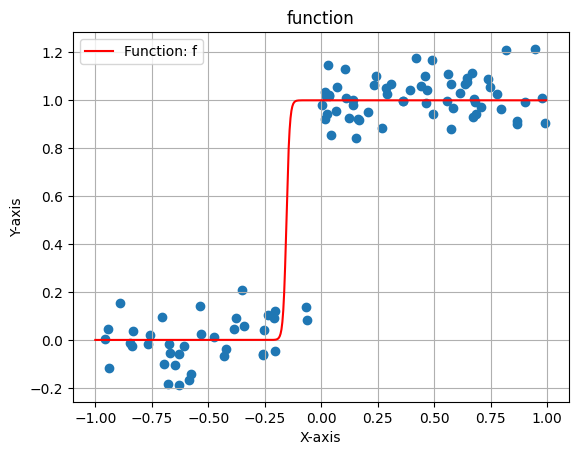

I played a lot with the inputs for this one, we end up getting good result sometimes, but we really need
a large number of steps and a very big stepsize. This is because the optimal result is when a is infinity
 and b does not really matter 


In [5]:
"""2. Implement the logistic regression f (x) = σ(ax + b). Choose F to be the step function
F (x) = x + |x|
2x ,
and train it by the plain gradient descent. Plot the training loss and the test loss against the number
of gradient descent steps for different values of the leaning rate. Make a contour plot of the training
loss as a function of (a, b) and depict the path of the gradient descent algorithm for different values
of the learning rate and for different initial values (a0, b0). Perform experiments to see how the size
of the training data set affects the quality of the regression."""

def F(x) :
    return (x + abs(x)) / (2 * x)

def logistic(x) :

    return 1 / (1 + math.exp(x * -1))

class Logistic_Regression :

    def __init__(self, parameters, linear_regression=None) :

        if linear_regression != None : 
            self.linear_regression = linear_regression
        else :
            self.linear_regression = None

            self.parameters = parameters

    def f(self,x) :

        if self.linear_regression != None : 
            return logistic(lself.linear_regression(x))
            
        else :

            a = self.parameters[0]
            b = self.parameters[1]
    
            return logistic(a * x + b)

def eval_gradient_least_square_logistic(data, logreg_parameters):
    grad_a = 0
    grad_b = 0
    a = logreg_parameters[0]
    b = logreg_parameters[1]

    for point in data:
        x = point[0]
        y = point[1]
        grad_a += (x * math.exp(x * a + b))/((math.exp(x * a + b) + 1) ** 2) # derivative of ((1/(1+e^-(ax+b)) - y)^2 wrt a is (x*e^(x*a+b))/(e^(x*a+b)+1)^2
        grad_b += (math.exp(b + a * x) / ( (math.exp( b + a * x) + 1 ) ** 2)) # derivative of ((1/(1+e^-(ax+b)) - y)^2 wrt b is e^(b+a*x)/(e^(b+a*x)+1)^2

    #print("grada" + str(grad_a))
    #print("gradb" + str(grad_b))
    
    return [grad_a / len(data), grad_b / len(data)] # should we divide by len(data) ? 

def train_my_logistic_regression(nb_epoch, data,learning_rate,LogReg):

    for n in range(nb_epoch) :
        parameter_gradient = eval_gradient_least_square_logistic(data,LogReg.parameters )
        LogReg.parameters[0] = LogReg.parameters[0] - learning_rate * parameter_gradient[0] # a = a - n * (gradient of F with respect to a)
        LogReg.parameters[1] = LogReg.parameters[1] - learning_rate * parameter_gradient[1] # b = b - n * (gradient of F with respect to b)


my_training_data_set = training_data_set(F,100, 0.1) # we pass a standart derivation of 0.1, else the points are too random.
plotpoints(my_training_data_set)

myLogReg = Logistic_Regression([100,100])

train_my_logistic_regression(100000,my_training_data_set, 1,myLogReg)

plot_function(myLogReg.f, -1,1, 500)

"""

n = 0.1
number_of_steps = [10,20,40,80,100]

for nOfSteps in number_of_steps :

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    error_of_a = abs(myLinreg.parameters[0] - 3/math.exp(1))
    error_of_b = abs(myLinreg.parameters[1] - (math.exp(1) ** 2 -1)/(2 * math.exp(1) ))
    
    plt.scatter([nOfSteps], [error_of_a], color="red")
    plt.scatter([nOfSteps], [error_of_b], color="blue")

"""

plt.show()

print("I played a lot with the inputs for this one, we end up getting good result sometimes, but we really need")
print("a large number of steps and a very big stepsize. This is because the optimal result is when a is infinity")
print(" and b does not really matter ")

# TODO : Plot the training loss and 
# TODO : Plot the test loss against the number of gradient descent steps for different values of the leaning rate
# TODO : Make a contour plot of the training loss as a function of (a, b)
# TODO : depict the path of the gradient descent algorithm for different values of the learning rate
# TODO : depict the path of the gradient descent algorithm for different initial values (a0, b0).
# TODO : Perform experiments to see how the size of the training data set affects the quality of the regression.



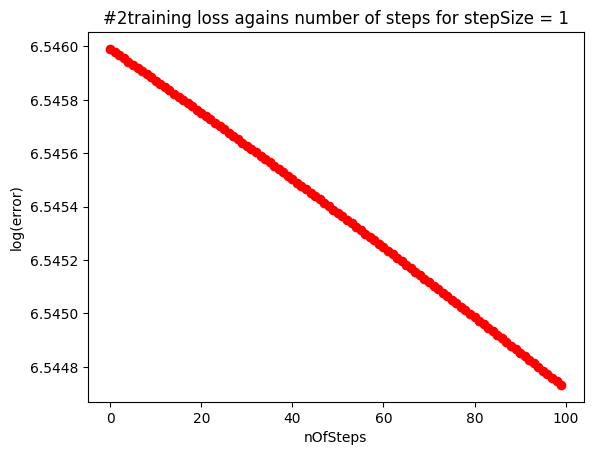

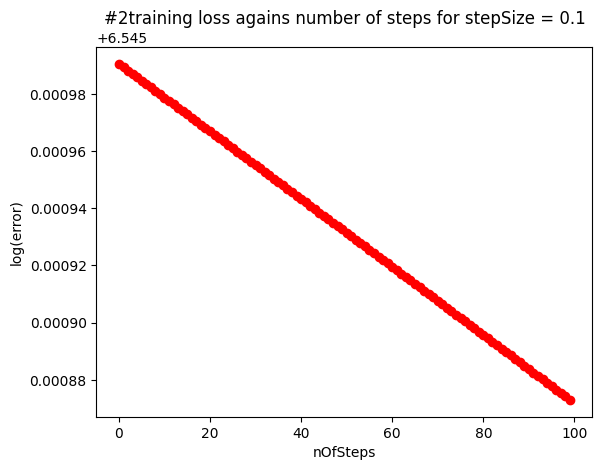

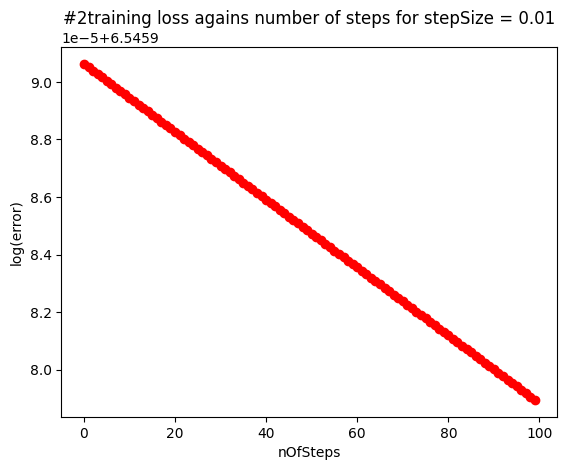

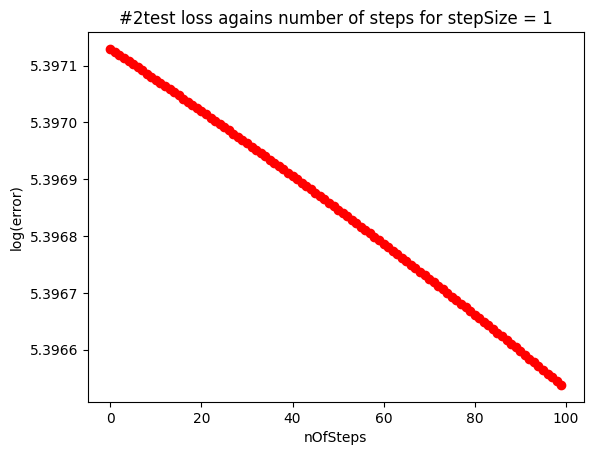

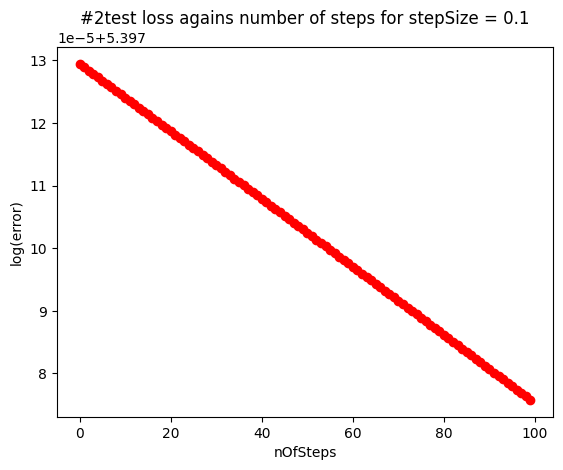

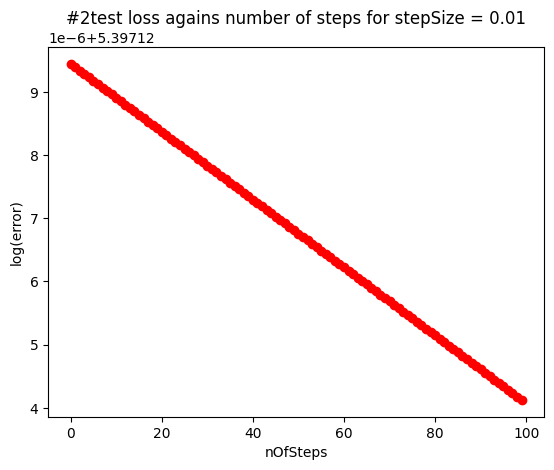

In [6]:
#loss 

my_training_data_set = training_data_set(F,500) 
my_test_data_set = test_data_set(F,500) 
 

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#2training loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#2training loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#2training loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


# test loss

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#2test loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#2test loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#2test loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




100.00003839295005
-0.06522057647194396


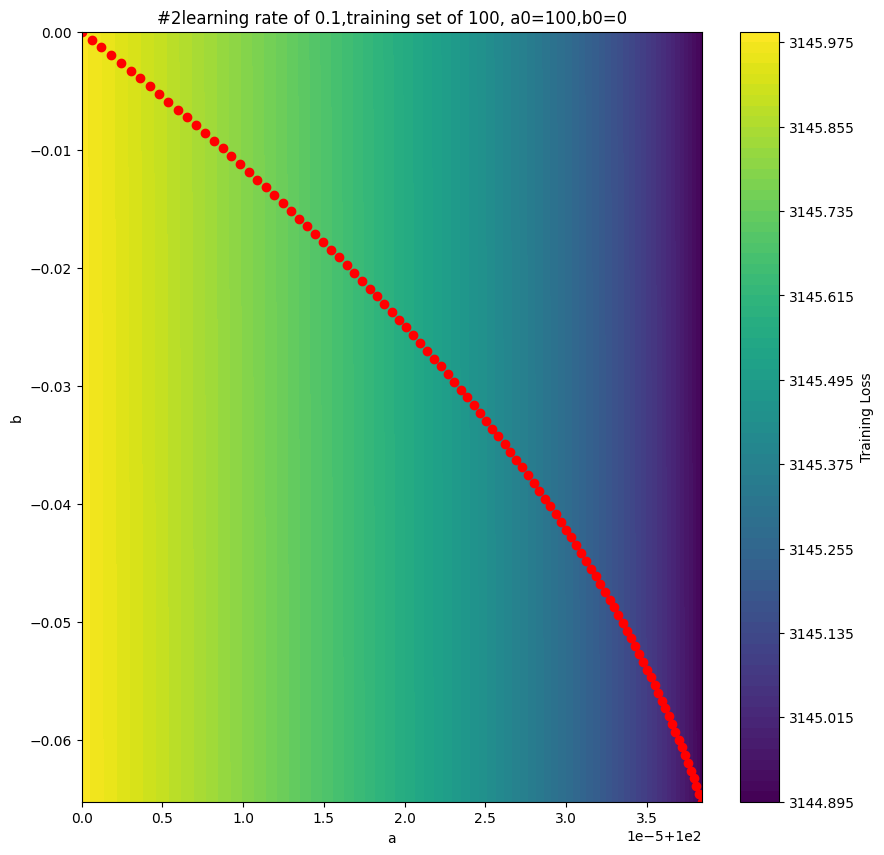

as we can see, since B does not matter, all of the right side is blue
our result gets better and better as nOfSteps increase !
99.99995990681715
-0.004453574799673012


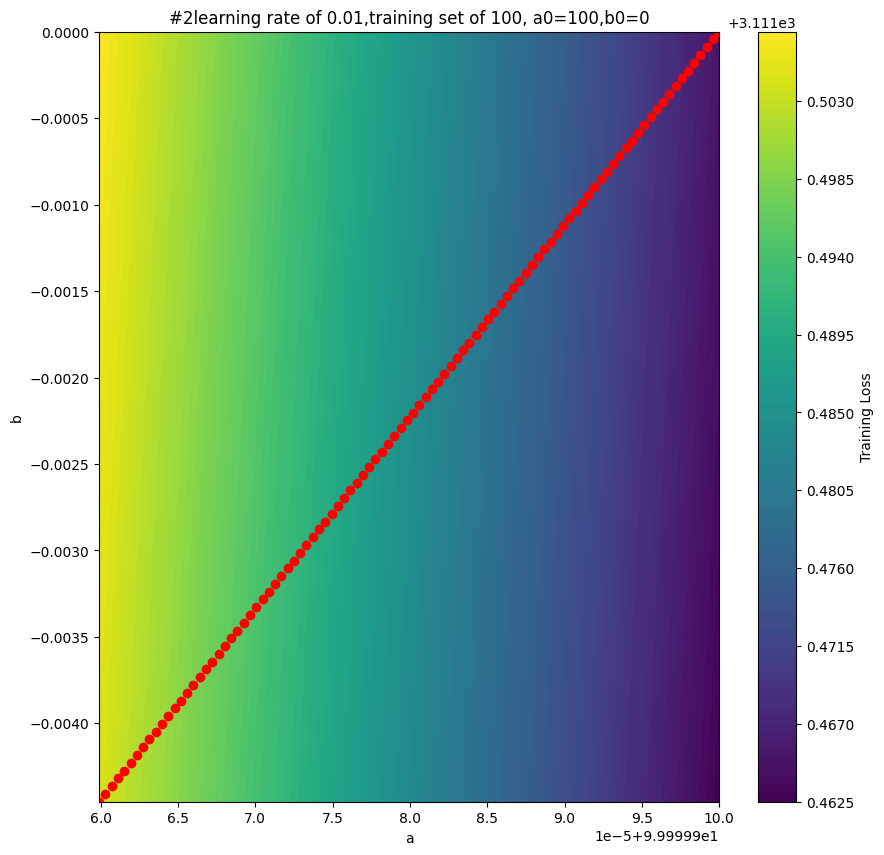

0.1823910332061458
-1.8458798997393775


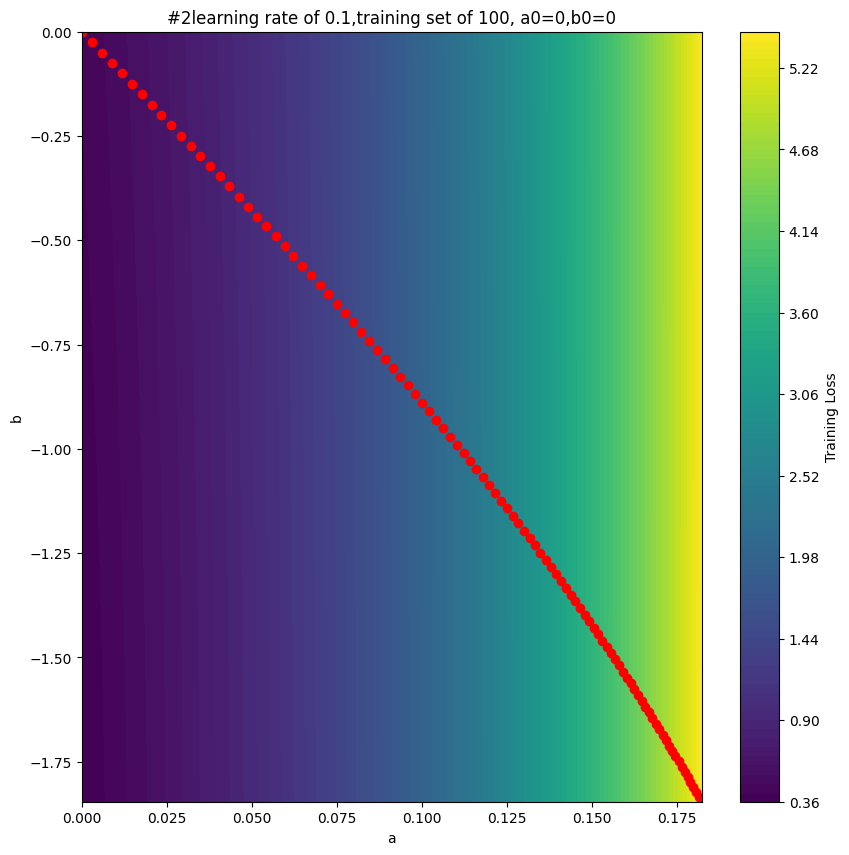

this regression seems to be more sentible to initial conditions, sometimes, if we put a0 = 0, 
it has a hard time improving itself.
100.037765798091
99.9617412074747


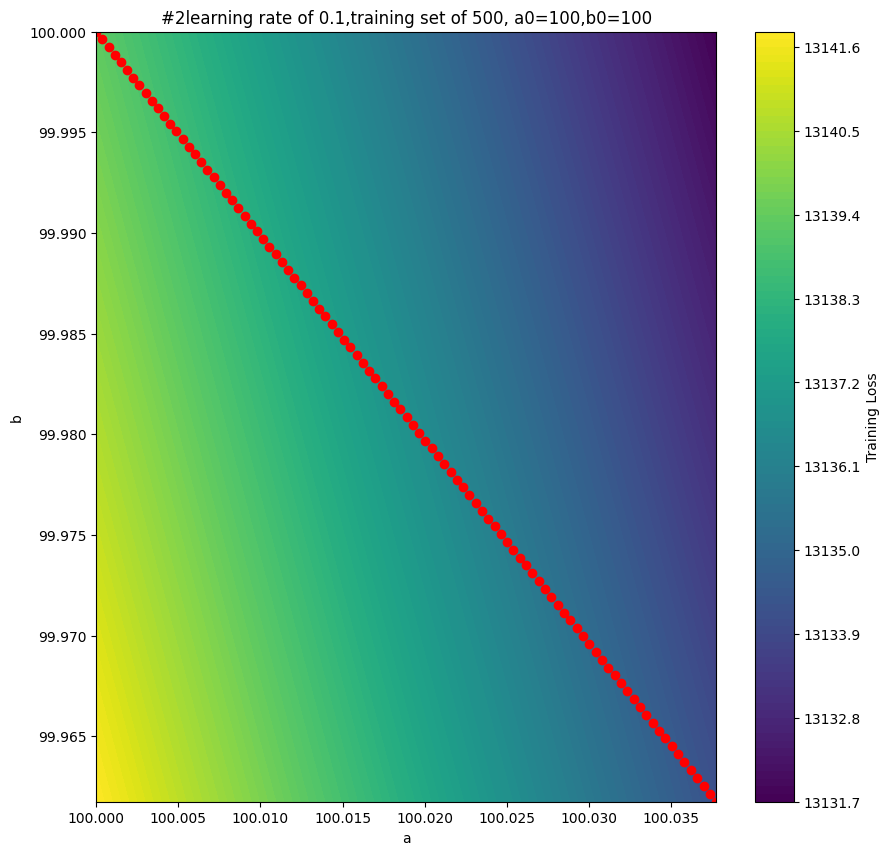

In [9]:
my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate

x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    train_my_logistic_regression(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#2learning rate of 0.1,training set of 100, a0=100,b0=0")

print("as we can see, since B does not matter, all of the right side is blue")
print("our result gets better and better as nOfSteps increase !")




my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.01
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    train_my_logistic_regression(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#2learning rate of 0.01,training set of 100, a0=100,b0=0")


my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([0,0])

    train_my_logistic_regression(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#2learning rate of 0.1,training set of 100, a0=0,b0=0")

print("this regression seems to be more sentible to initial conditions, sometimes, if we put a0 = 0, ")
print("it has a hard time improving itself.")


my_training_data_set = training_data_set(F,500, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,100])

    train_my_logistic_regression(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#2learning rate of 0.1,training set of 500, a0=100,b0=100")





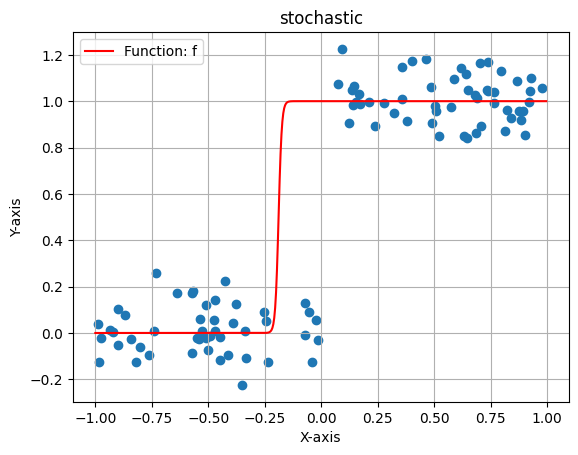

139.12009365836496
26.272559469035272


In [10]:
"""We repeat the previous exercise with some gradient descent variants. You may change the target
function F if you nd it boring. The variants of gradient descent we consider are: stochastic gradient
descent, and at least one of the following: momentum, Nesterov, Adagrad, Adadelta, RMSprop,
Adam, AdaMax, and Nadam. The descriptions of these algorithms including pointers to further
reading are given in a paper by S. Ruder uploaded to MyCourses."""


def stochastic_grad_descent_train(nb_epoch, data,learning_rate,LogReg) :

    # the only difference is we calculate the gradient then update the parameters for each example
    # separately 

    for i in range(nb_epoch) :
        np.random.shuffle(data) # we also shuffle the data before, as god intended.
        for example in data : 

            param_grad = eval_gradient_least_square_logistic([example], LogReg.parameters)
            LogReg.parameters[0] = LogReg.parameters[0] - learning_rate * param_grad[0] # a = a - n * (gradient of F with respect to a)
            LogReg.parameters[1] = LogReg.parameters[1] - learning_rate * param_grad[1] # b = b - n * (gradient of F with respect to b)


def momentum_grad_descent_train(nb_epoch, data,learning_rate,LogReg):

    momenterm_a = 0 # va_0
    momenterm_b = 0 # vb_0
    
    fraction = 0.9 # as god intented

    for i in range(nb_epoch) :
        np.random.shuffle(data)

        for example in data : 

   
            param_grad = eval_gradient_least_square_logistic([example], LogReg.parameters)

            momenterm_a = momenterm_a * fraction + learning_rate * param_grad[0]
            LogReg.parameters[0] = LogReg.parameters[0] - momenterm_a

            momenterm_b = momenterm_b * fraction + learning_rate * param_grad[1]
            LogReg.parameters[1] = LogReg.parameters[1] - momenterm_b

            
my_training_data_set = training_data_set(F,100, 0.1) # we pass a standart derivation of 0.1, else the points are too random.
plotpoints(my_training_data_set)

myLogReg = Logistic_Regression([100,100])

stochastic_grad_descent_train(1000,my_training_data_set, 1,myLogReg)

plot_function(myLogReg.f, -1,1, 500, "stochastic")

plt.show()

print(myLogReg.parameters[0])
print(myLogReg.parameters[1])   
        



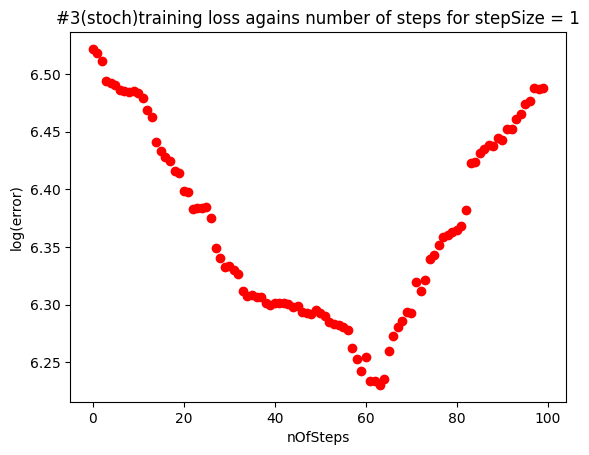

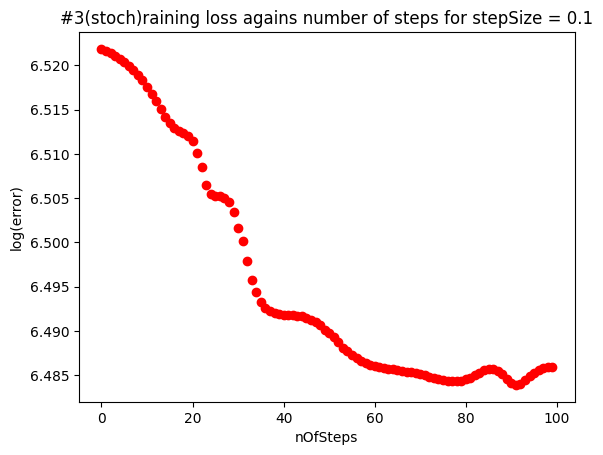

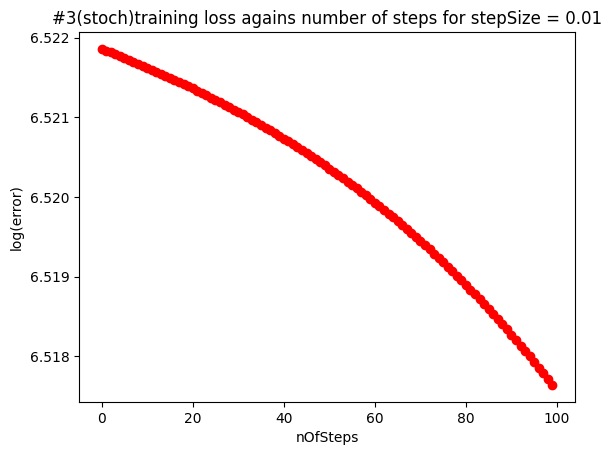

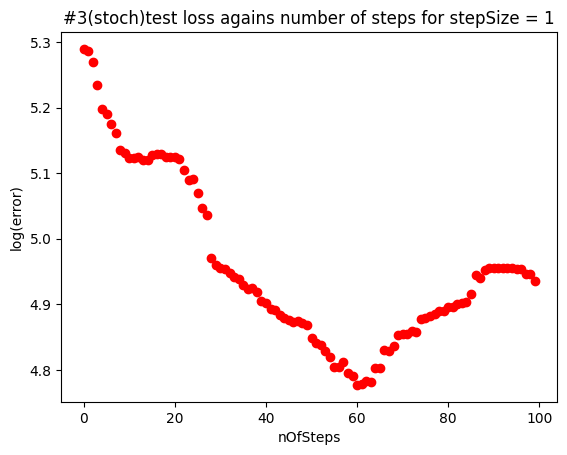

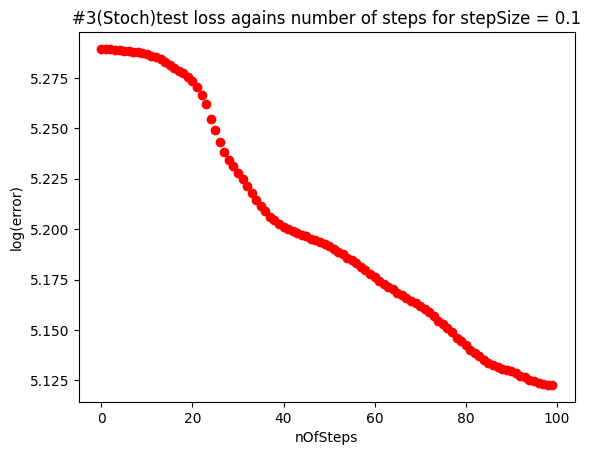

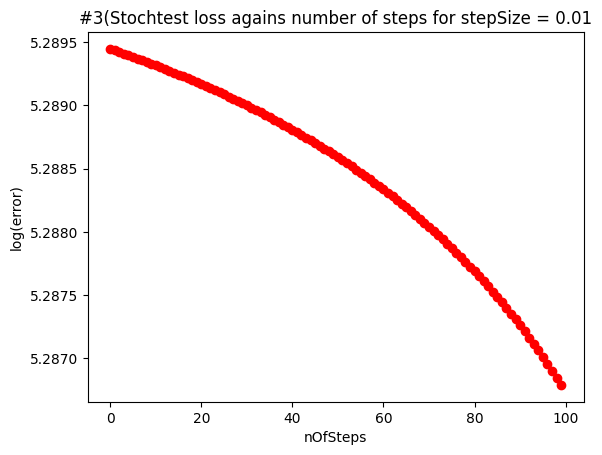

In [11]:
# training & test loss for stochastic

my_training_data_set = training_data_set(F,500) 
my_test_data_set = test_data_set(F,500) 
 

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(stoch)training loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(stoch)raining loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(stoch)training loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


# test loss

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(stoch)test loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(Stoch)test loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(Stochtest loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




99.87827724706028
-4.2793815178185435


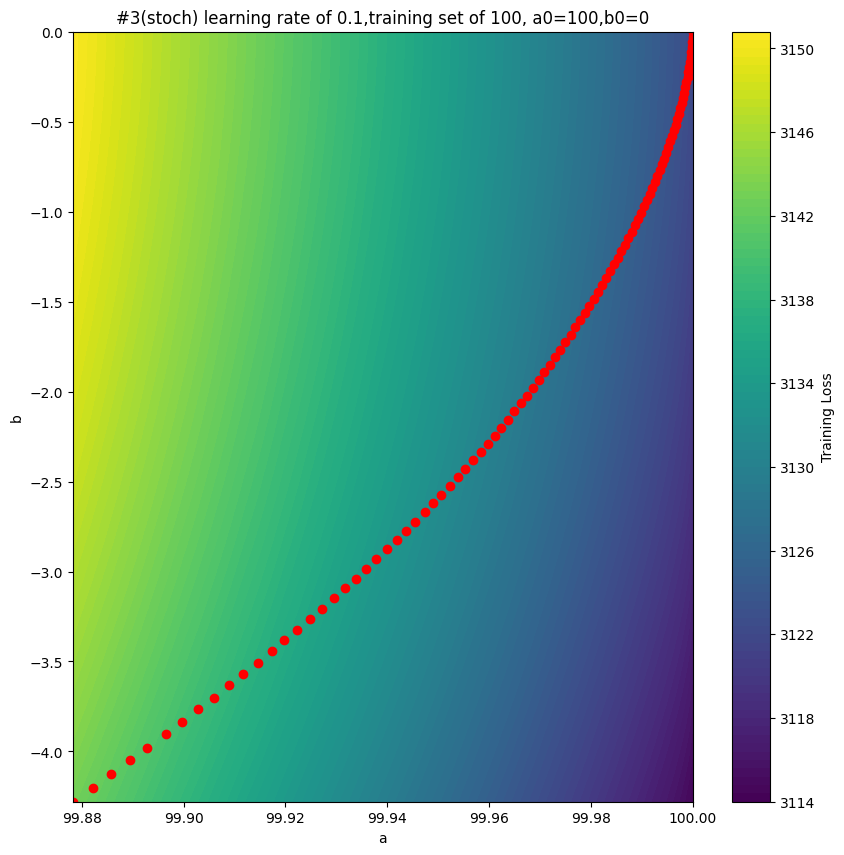

100.00150344344894
-0.616972397499093


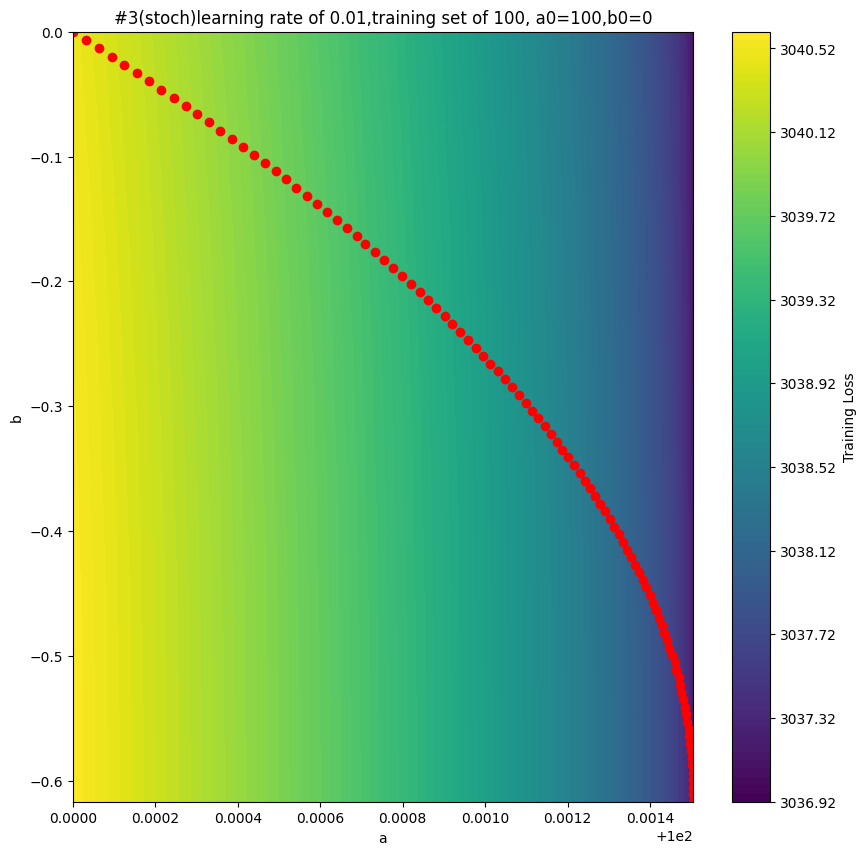

0.15673046541425514
-6.879210729644145


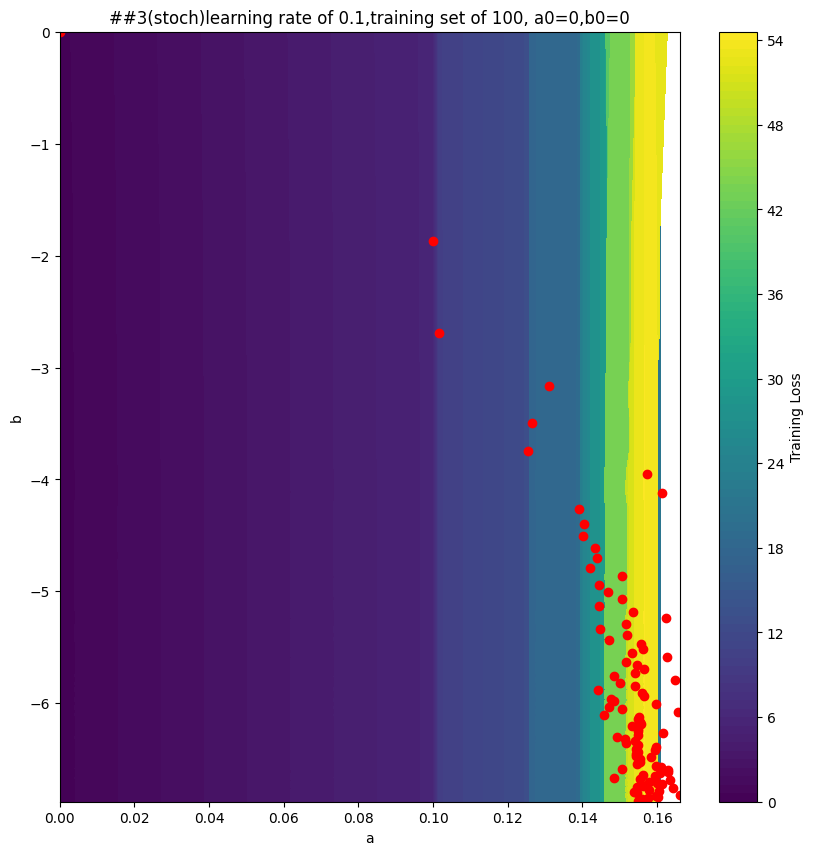

116.1590502886183
80.67331892971544


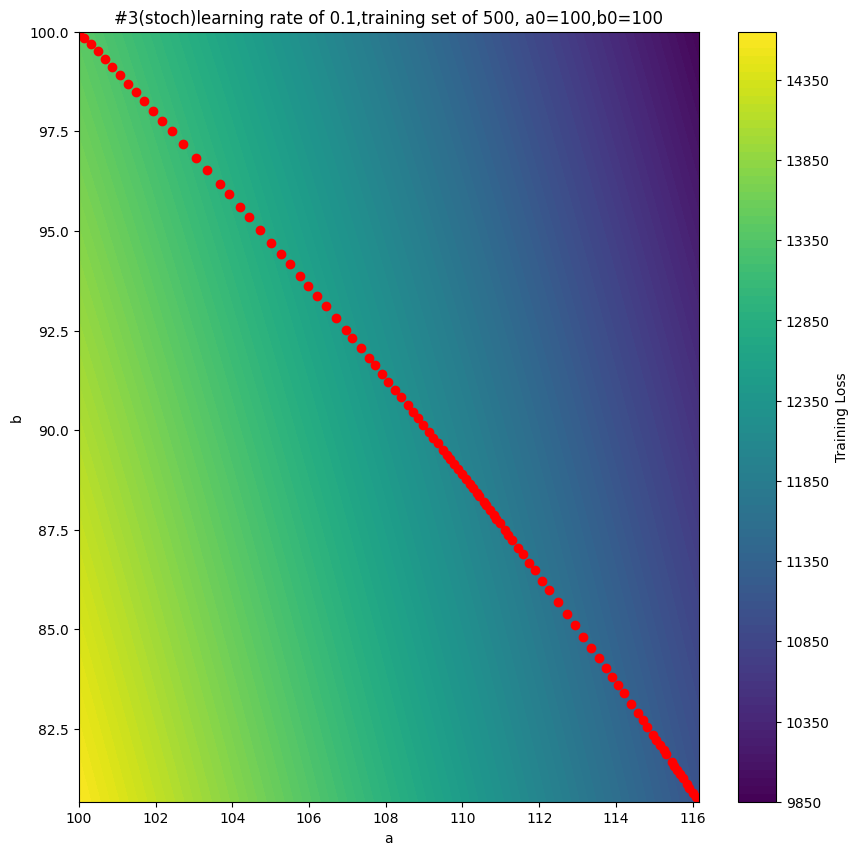

In [15]:
# contour graph for stochastic

my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(stoch) learning rate of 0.1,training set of 100, a0=100,b0=0")





my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.01
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(stoch)learning rate of 0.01,training set of 100, a0=100,b0=0")


my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([0,0])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "##3(stoch)learning rate of 0.1,training set of 100, a0=0,b0=0")



my_training_data_set = training_data_set(F,500, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,100])

    stochastic_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(stoch)learning rate of 0.1,training set of 500, a0=100,b0=100")



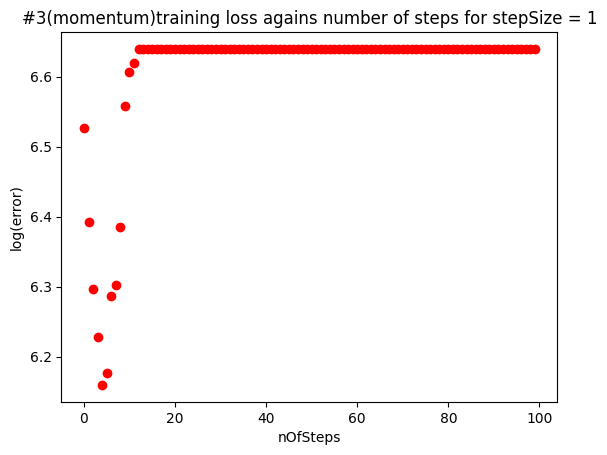

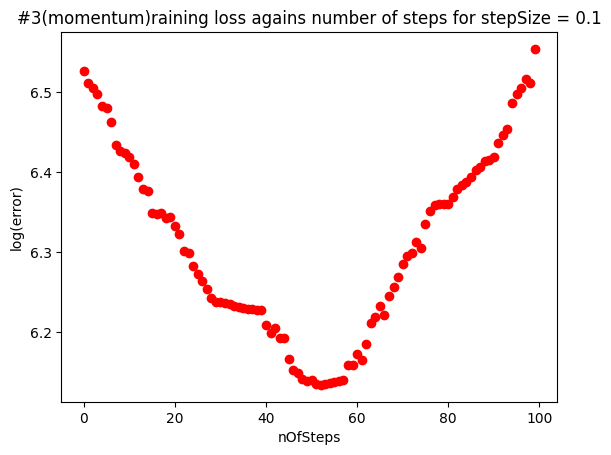

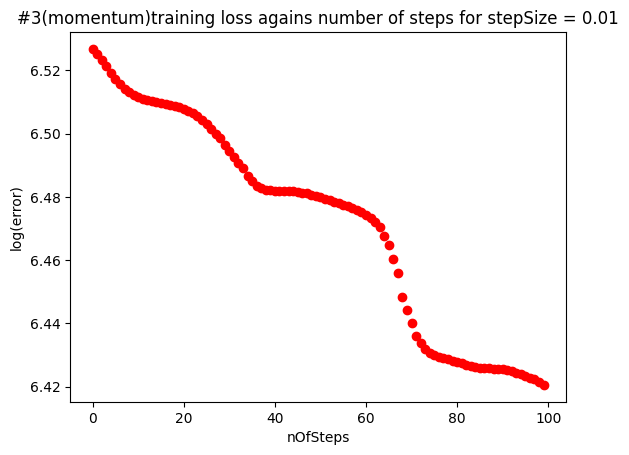

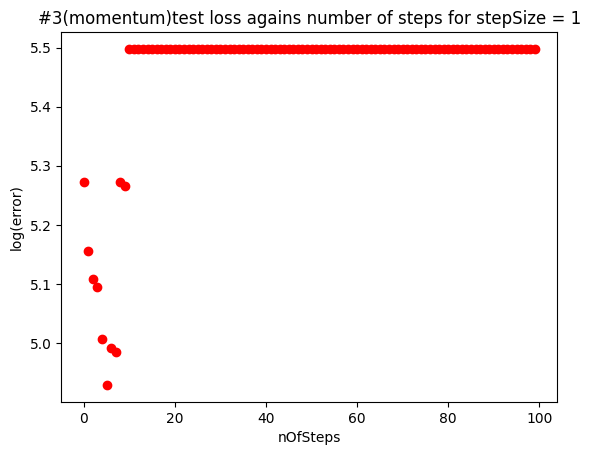

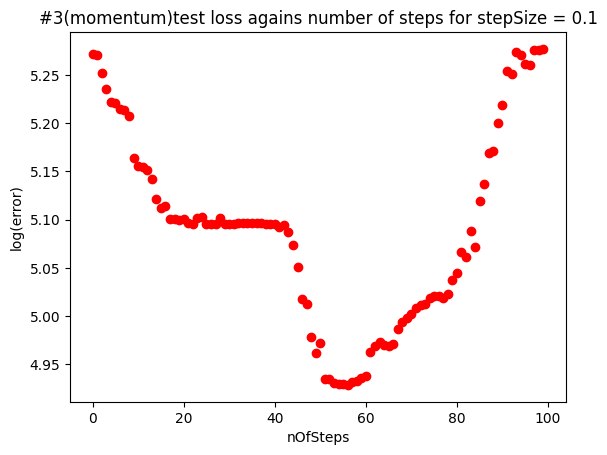

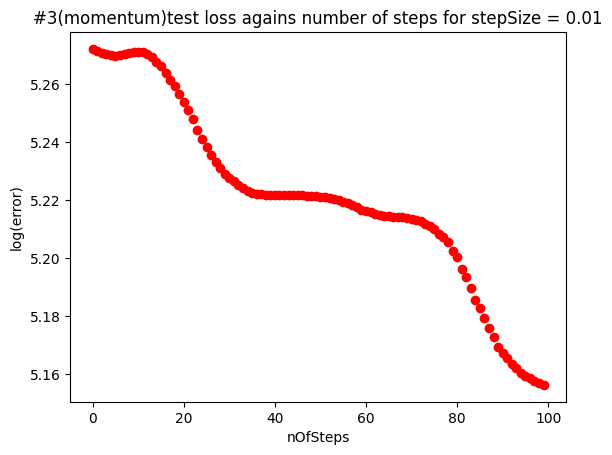

In [16]:
# training & test loss for momentumn

my_training_data_set = training_data_set(F,500) 
my_test_data_set = test_data_set(F,500) 
 

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(momentum)training loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(momentum)raining loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    training_loss = math.log(least_square(myLogReg.f, my_training_data_set))
    
 
    plt.scatter([nOfSteps], [training_loss], color="red")



plt.title('#3(momentum)training loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


# test loss

n = 1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(momentum)test loss agains number of steps for stepSize = 1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()




n = 0.1


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(momentum)test loss agains number of steps for stepSize = 0.1')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()



n = 0.01


for nOfSteps in range(100) :
    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set,n, myLogReg)

    test_loss = math.log(least_square(myLogReg.f, my_test_data_set))
    
 
    plt.scatter([nOfSteps], [test_loss], color="red")



plt.title('#3(momentum)test loss agains number of steps for stepSize = 0.01')
plt.ylabel('log(error)')
plt.xlabel('nOfSteps')

plt.show()


90.62903076724686
-42.49734451581945


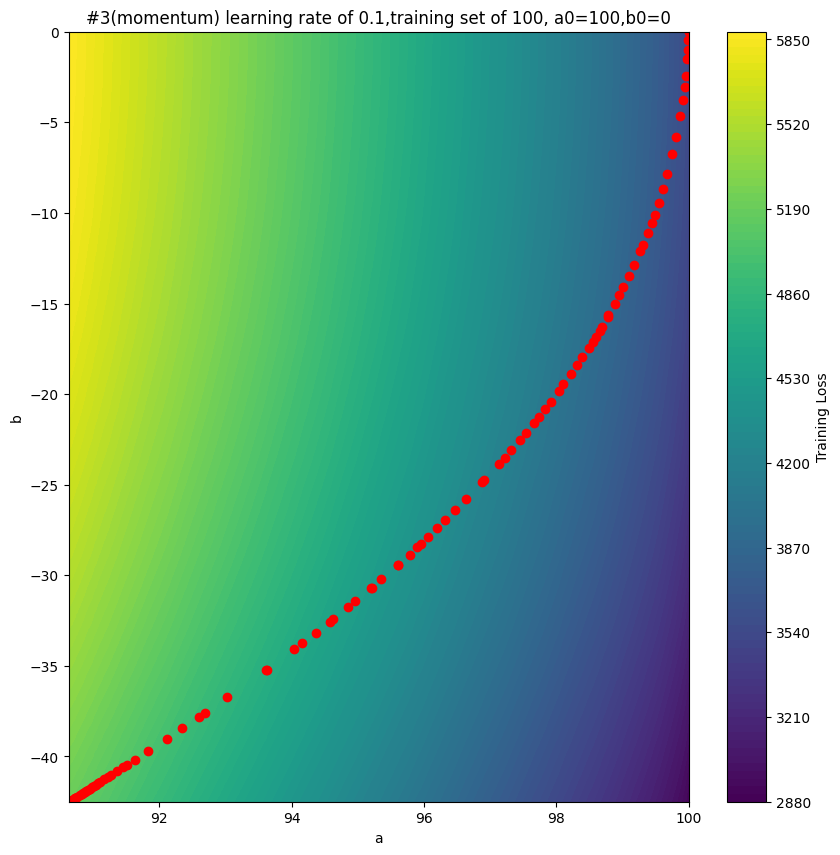

99.9798148025253
-3.0502157786140294


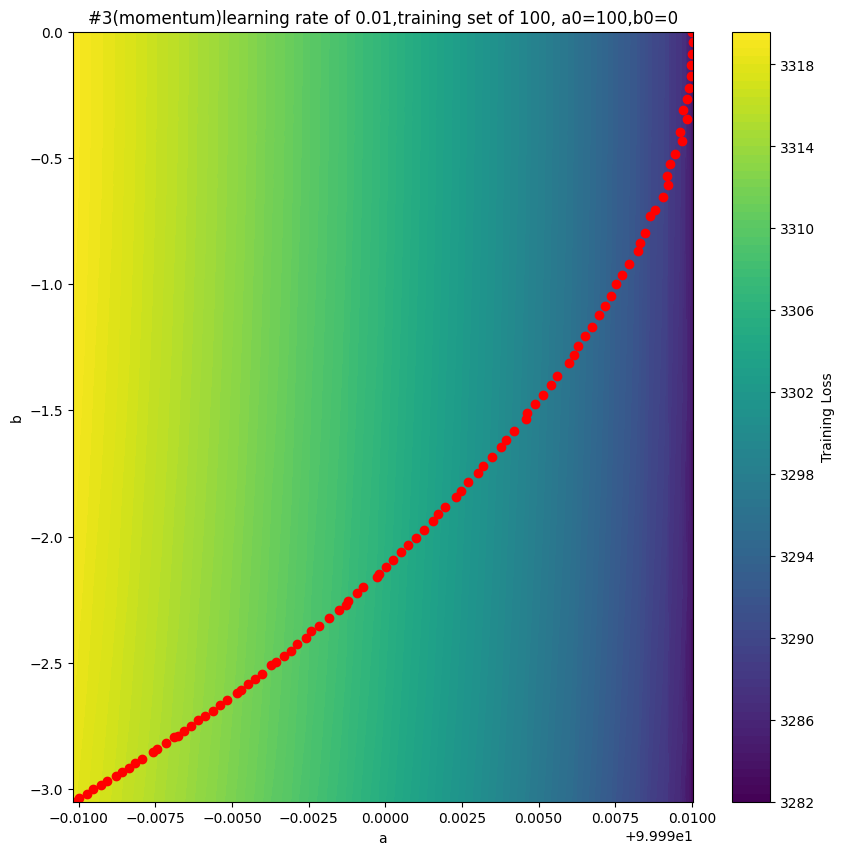

-0.1415886067719167
-9.209869140823677


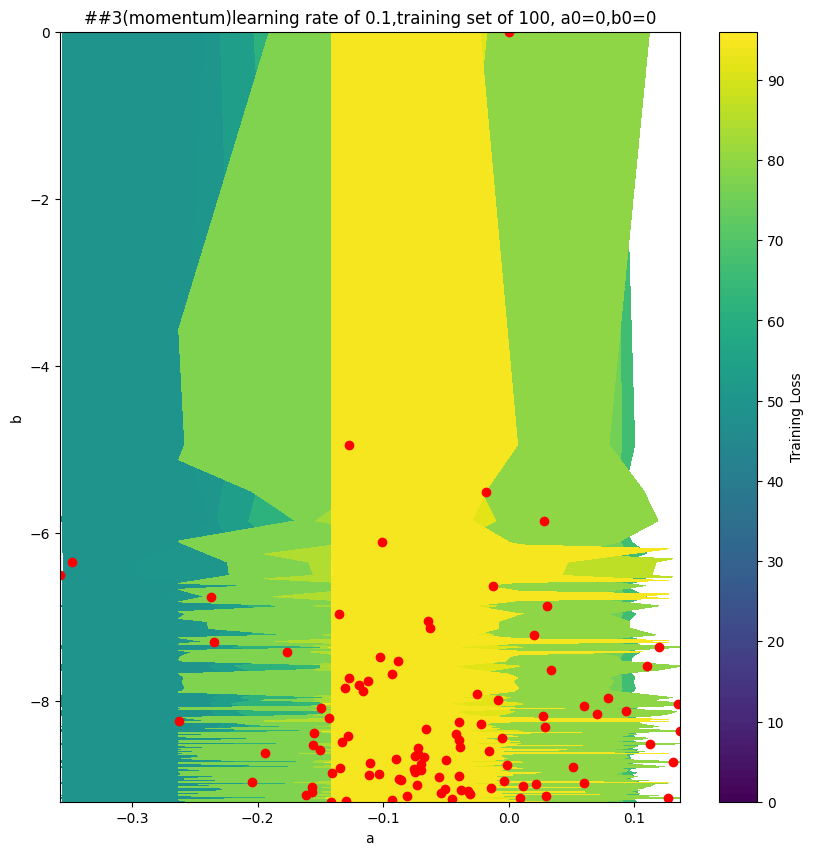

116.35458267690517
-80.61004352026308


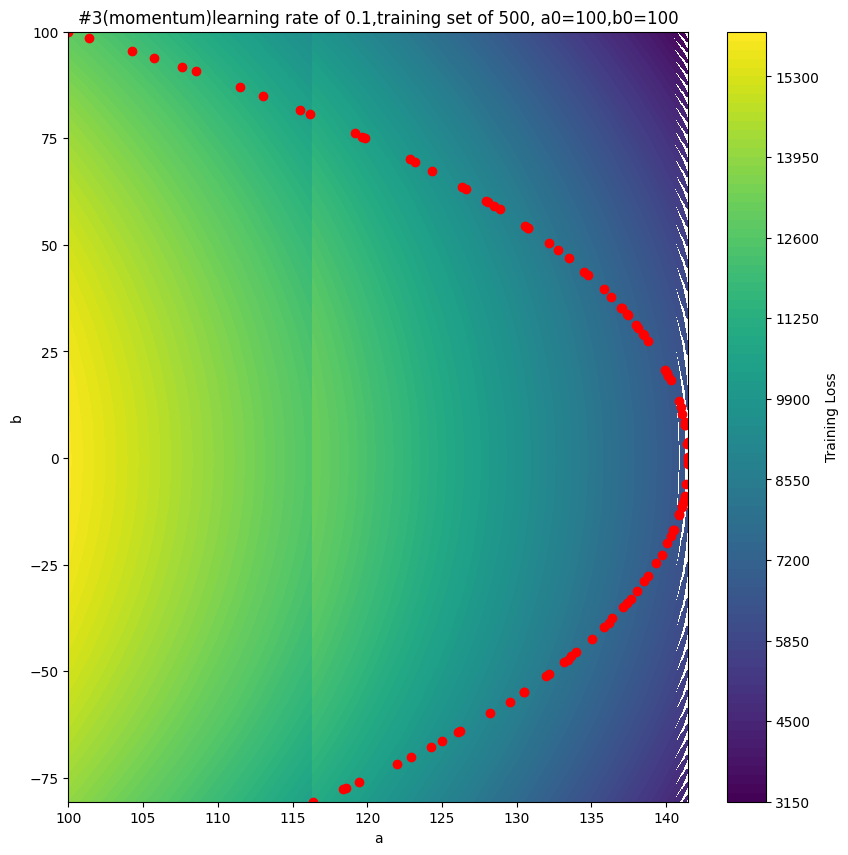

In [21]:
# contour graph for momentum

my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    momentum_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(momentum) learning rate of 0.1,training set of 100, a0=100,b0=0")





my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.01
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,0])

    momentum_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(momentum)learning rate of 0.01,training set of 100, a0=100,b0=0")


my_training_data_set = training_data_set(F,100, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([0,0])

    momentum_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "##3(momentum)learning rate of 0.1,training set of 100, a0=0,b0=0")



my_training_data_set = training_data_set(F,500, 0.01) # the set we try to approximate
# we always start with y = 0x + 0 to compare 
x_train = []
y_train = []

for entry in my_training_data_set :
    x_train.append(entry[0])
    y_train.append(entry[1])

n = 0.1
a_value = []
b_value = [] 

for nOfSteps in range(100) :

    myLogReg = Logistic_Regression([100,100])

    momentum_grad_descent_train(nOfSteps,my_training_data_set, n,myLogReg)
    #plt.plot(myLinreg.parameters[0])
    #plt.plot(myLinreg.parameters[1])
    
    a_value.append(myLogReg.parameters[0])
    b_value.append(myLogReg.parameters[1])


print(myLogReg.parameters[0])
print(myLogReg.parameters[1])

loss_values = get_loss_values(a_value,b_value,x_train,y_train)

plot_contour(a_value, b_value, loss_values, "#3(momentum)learning rate of 0.1,training set of 500, a0=100,b0=100")


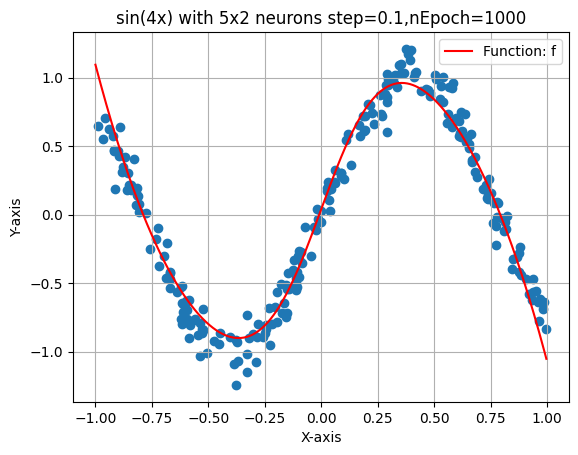

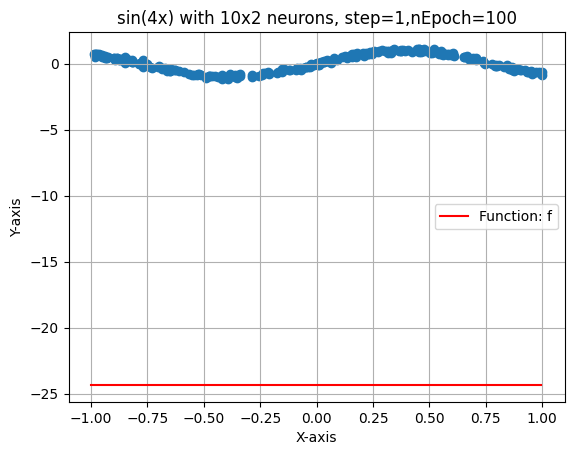

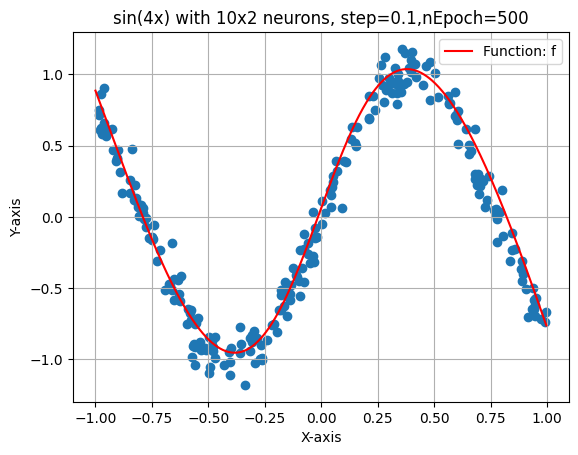

My neural network works really well with this relativly simple function. Since it uses stockastic gradient
Descent, keeping the step small is very important (we ca see that on the 2'th graph, where the step is too
large and our result is very bad.


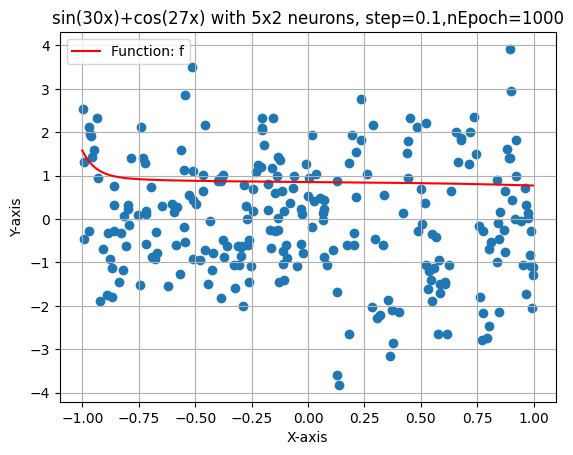

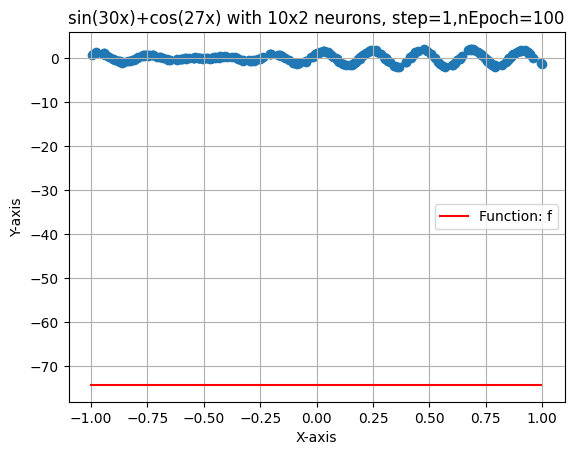

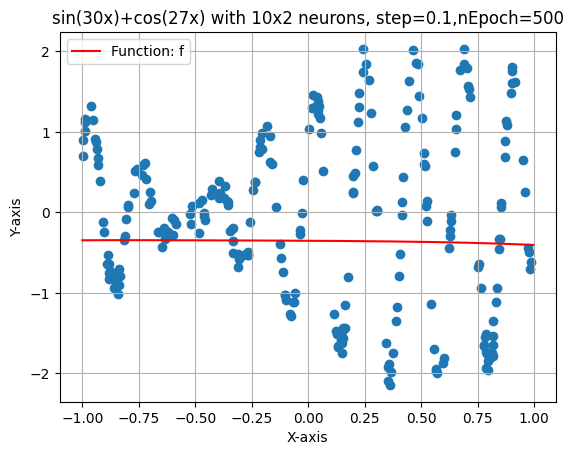

This function is too complicated for my neural net to compute efficiently using simply stochastic gradient descent
I made many, many other tests, and results were bad even with better inputs leading to unreasonable training time
(larger number of neurons, larger number of epoch, smaller/larger steps), results were still bad


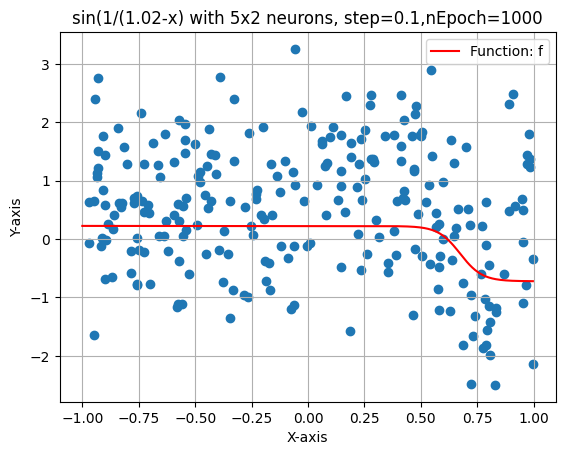

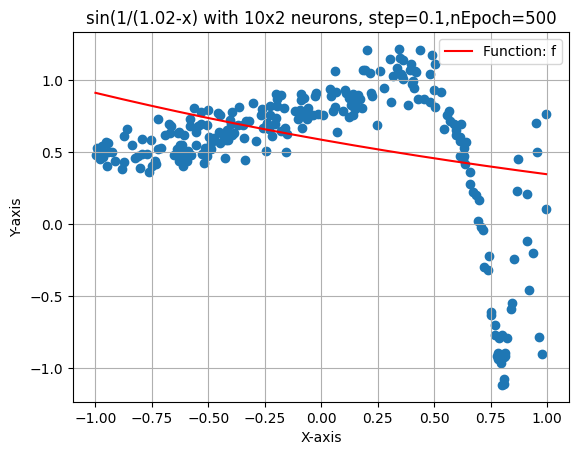

This function is too complicated for my neural net to compute efficiently using simply stochastic gradient descent
I made many, many other tests, and results were bad even with better inputs leading to unreasonable training time
(larger number of neurons, larger number of epoch, smaller/larger steps), results were still bad


In [22]:
"""Implement the 2-layer neural network
f (x) = c1σ(a1x + b1) + . . . cnσ(anx + bn) + b,
with the following target functions:
F (x) = sin 30x + cos 27x, F (x) = sin 1
1.02 − x ,
and in addition, a function of your choice. For each of these 3 functions, perform experiments
varying the following.
• Hidden layer width n. Naturally, we want this to be as small as possible.
• Activation function σ. You may introduce a third option, in addition to the logistic and ReLU.
• Training method: Gradient descent variant, with additional strategies and parameters associ-
ated with it, such as the learning rate schedule.
• The training data size N . Naturally, we want this to be as small as possible.
You do not have to include every combination of strategies you have tried in the nal submission, but
report your nal conclusions and observations you nd interesting, backed up by some illustrative
examples and plots. You can do reading on your own and bring in different strategies to try. The
nal goal to have in mind is to identify what works best for each of the 3 functions.
"""


class NeuralNet2D:


    def __init__(self,n):

        self.a_weights = [] # hidden
        self.bn_biases = []
        
        
        self.c_weights = [] # output
        self.b_bias = 0

        for i in range(n) :
            self.a_weights.append(np.random.normal())
            self.c_weights.append(np.random.normal())
            self.bn_biases.append(0)

    def logistic(self,x) : 

        if math.exp(-x) == -1 :
            return 0
        else :

            return 1 / (1 + math.exp(-x))

    def compute_hidden_layer(self, x) :

        result = [] 

        for i in range(len(self.a_weights)) :
            result.append(self.a_weights[i] * x + self.bn_biases[i])
            
        return result

    def compute_output_layer(self, ls_of_inner_results) : 

        final_result = 0 

        for i in range(len(self.c_weights)) :
            final_result += self.c_weights[i] * self.logistic(ls_of_inner_results[i]) 

        final_result += self.b_bias

        return final_result

    def f(self, x) :

        return self.compute_output_layer(self.compute_hidden_layer(x))


def eval_gradient_neuralNet_wrt(example, NeuralNet2D, variable):

    x = example[0]
    y = example[1]

    ls_of_deriv = []

    if variable == "a" : 

        for i in range(len(NeuralNet2D.a_weights)) :

            ai = NeuralNet2D.a_weights[i]
            bi = NeuralNet2D.bn_biases[i]
            ci = NeuralNet2D.c_weights[i]
            
            ls_of_deriv.append(2 * (NeuralNet2D.f(x) - y) * ((ci * x * math.exp(x * ai + bi))/((math.exp(x * ai + bi) + 1 )**2)))
                                                             
    elif variable == "bn" :
        
                                                             
        for i in range(len(NeuralNet2D.bn_biases)) :

            ai = NeuralNet2D.a_weights[i]
            bi = NeuralNet2D.bn_biases[i]
            ci = NeuralNet2D.c_weights[i]
            
            ls_of_deriv.append(2 * (NeuralNet2D.f(x) - y) * ((ci * math.exp(x * ai + bi))/((math.exp(x * ai + bi) + 1 )**2)))
            
    elif variable == "c" :

        for i in range(len(NeuralNet2D.bn_biases)) :

            ai = NeuralNet2D.a_weights[i]
            bi = NeuralNet2D.bn_biases[i]
            ci = NeuralNet2D.c_weights[i]


            ls_of_deriv.append(2 * (NeuralNet2D.f(x) - y) * (1 / (math.exp((-1) *(ai * x - bi)) + 1 )))

    elif variable == "b" :

        ls_of_deriv.append(2 * (NeuralNet2D.f(x) - y) * 1)
        
    return ls_of_deriv

        
        




def train_my_neural_net(nb_epoch, data,learning_rate,NeuralNet2D) :

    for i in range(nb_epoch) : 
        np.random.shuffle(data)

        for example in data :
            param_grad_an = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "a") # return gradients of a0, ... , an
            param_grad_bn = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "bn") # return gradients of b0, ... , bn
            param_grad_cn = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "c") # return gradients of c0, ... , cn
            param_grad_b = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "b")


            for i in range(len(param_grad_an)) :
                NeuralNet2D.a_weights[i] =  NeuralNet2D.a_weights[i] - learning_rate * param_grad_an[i]
                NeuralNet2D.bn_biases[i] =  NeuralNet2D.bn_biases[i] - learning_rate * param_grad_bn[i]
                NeuralNet2D.c_weights[i] =  NeuralNet2D.c_weights[i] - learning_rate * param_grad_cn[i]
            
            NeuralNet2D.b_bias = NeuralNet2D.b_bias - learning_rate * param_grad_b[0]


def F0(x): 
    return math.sin(4 *x)

for k in range(10) :
    try : # Sometimes a random number cause an overflow error, so we start over if this happens.

        myNeuralNet = NeuralNet2D(5)
        my_training_data_set = training_data_set(F0,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(1000, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(4x) with 5x2 neurons step=0.1,nEpoch=1000")
        plt.show()
        break
    except : 
        continue
        
for k in range(10) :
    try : 
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F0,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(100, my_training_data_set,1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(4x) with 10x2 neurons, step=1,nEpoch=100")
        plt.show()
        break
    except : 
        continue

for k in range(10) :
    try : 
        
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F0,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(500, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(4x) with 10x2 neurons, step=0.1,nEpoch=500")
        plt.show()
        
        print("My neural network works really well with this relativly simple function. Since it uses stockastic gradient")
        print("Descent, keeping the step small is very important (we ca see that on the 2'th graph, where the step is too") 
        print("large and our result is very bad.")
        break
    except : 
        continue




def F1(x): 
    return math.sin(30 *x) + math.cos( 27 * x)

for k in range(10) :
    try : # Sometimes a random number cause an overflow error, so we start over if this happens.

        myNeuralNet = NeuralNet2D(5)
        my_training_data_set = training_data_set(F1,250, 1)
        plotpoints(my_training_data_set)
        train_my_neural_net(1000, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(30x)+cos(27x) with 5x2 neurons, step=0.1,nEpoch=1000")
        plt.show()
        break
    except : 
        continue
        
for k in range(10) :
    try : 
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F1,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(100, my_training_data_set,1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(30x)+cos(27x) with 10x2 neurons, step=1,nEpoch=100")
        plt.show()
        break
    except : 
        continue

for k in range(10) :
    try : 
        
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F1,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(500, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(30x)+cos(27x) with 10x2 neurons, step=0.1,nEpoch=500")
        plt.show()
        
        print("This function is too complicated for my neural net to compute efficiently using simply stochastic gradient descent")
        print("I made many, many other tests, and results were bad even with better inputs leading to unreasonable training time") 
        print("(larger number of neurons, larger number of epoch, smaller/larger steps), results were still bad")
        break
    except : 
        continue

    
    


def F2(x) : 
    return math.sin(1/(1.02 - x))

for k in range(10) :
    try : 
        
        myNeuralNet = NeuralNet2D(5)
        my_training_data_set = training_data_set(F2,250, 1)
        plotpoints(my_training_data_set)
        train_my_neural_net(1000, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(1/(1.02-x) with 5x2 neurons, step=0.1,nEpoch=1000")
        plt.show()
        break
    except : 
        continue
        
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F2,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(100, my_training_data_set,1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(1/(1.02-x) with 10x2 neurons, step=1,nEpoch=100")
        plt.show()
        
for k in range(10) :
    try : 
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F2,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net(500, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(1/(1.02-x) with 10x2 neurons, step=0.1,nEpoch=500")
        plt.show()
        
        print("This function is too complicated for my neural net to compute efficiently using simply stochastic gradient descent")
        print("I made many, many other tests, and results were bad even with better inputs leading to unreasonable training time") 
        print("(larger number of neurons, larger number of epoch, smaller/larger steps), results were still bad")
        break

    except :
        continue

        





        

        



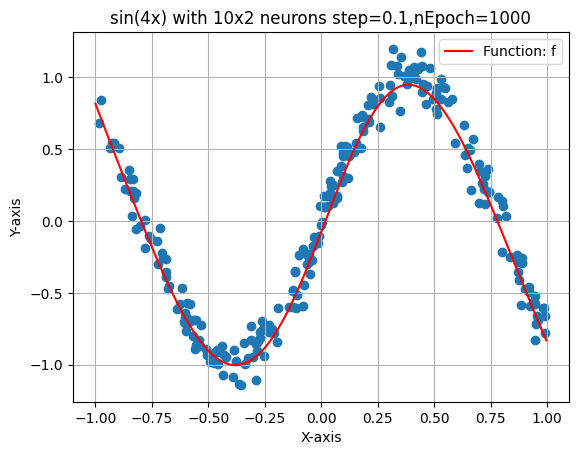

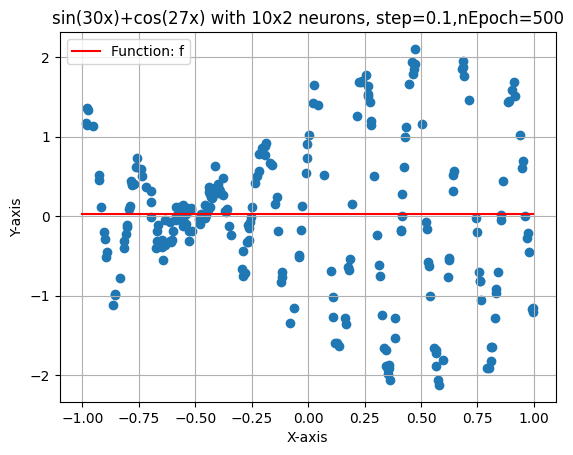

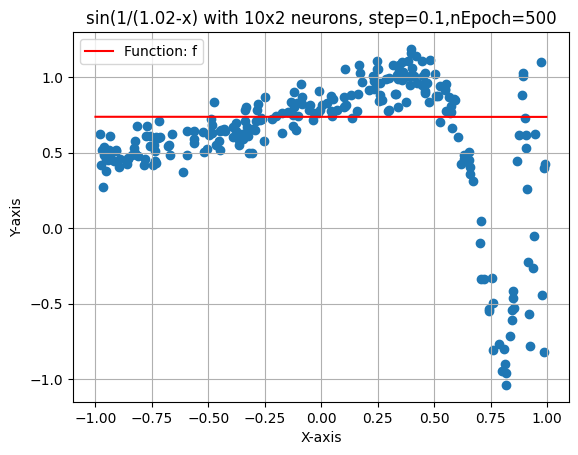

sadly, this method is even worse than the previous one, We still get good result for sin(4x), but it takes longuer
Moreover, the method still isn't working properly for the more complicated functions.


In [63]:
# We will try to use a better learning method (momentum) 



def train_my_neural_net_momentum(nb_epoch, data,learning_rate,NeuralNet2D) :

    fraction = 0.9

    momentums_a = []
    momentums_bn = []
    momentums_c = []
    momentums_b = 0

    for k in range(len(NeuralNet2D.a_weights)) :
        momentums_a.append(0)
        momentums_bn.append(0)
        momentums_c.append(0)   

    for i in range(nb_epoch) : 
        np.random.shuffle(data)

        for example in data :
            param_grad_an = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "a") # return gradients of a0, ... , an
            param_grad_bn = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "bn") # return gradients of b0, ... , bn
            param_grad_cn = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "c") # return gradients of c0, ... , cn
            param_grad_b = eval_gradient_neuralNet_wrt(example, NeuralNet2D, "b")

            for i in range(len(param_grad_an)) :
                momentums_a[i] =  momentums_a[i] * fraction + learning_rate * param_grad_an[i]
                momentums_bn[i] =  momentums_bn[i] * fraction + learning_rate * param_grad_bn[i]
                momentums_c[i] =  momentums_c[i] * fraction + learning_rate * param_grad_cn[i]

                NeuralNet2D.a_weights[i] =  NeuralNet2D.a_weights[i] - learning_rate * param_grad_an[i]
                
            momentums_b = momentums_b * fraction + learning_rate * param_grad_b[0]

            for i in range(len(param_grad_an)) :
                NeuralNet2D.a_weights[i] =  NeuralNet2D.a_weights[i] - momentums_a[i]
                NeuralNet2D.bn_biases[i] =  NeuralNet2D.bn_biases[i] - momentums_bn[i]
                NeuralNet2D.c_weights[i] =  NeuralNet2D.c_weights[i] - momentums_c[i]
            
            NeuralNet2D.b_bias = NeuralNet2D.b_bias - momentums_b

for k in range(10) :
    try : # Sometimes a random number cause an overflow error, so we start over if this happens.

        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F0,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net_momentum(1000, my_training_data_set,0.01,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(4x) with 10x2 neurons step=0.1,nEpoch=1000")
        plt.show()
        break
    except : 
        continue



for k in range(10) :
    try : 
        
  
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F1,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net_momentum(500, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(30x)+cos(27x) with 10x2 neurons, step=0.1,nEpoch=500")
        plt.show()
        
        break
    except : 
        continue

for k in range(10) :
    try : 
        
        myNeuralNet = NeuralNet2D(10)
        my_training_data_set = training_data_set(F2,250, 0.1)
        plotpoints(my_training_data_set)
        train_my_neural_net_momentum(500, my_training_data_set,0.1,myNeuralNet)
        plot_function(myNeuralNet.f, -1,1, 500, "sin(1/(1.02-x) with 10x2 neurons, step=0.1,nEpoch=500")
        plt.show()
        
        break

    except :
        continue


print("sadly, this method is even worse than the previous one, We still get good result for sin(4x), but it takes longuer")
print("Moreover, the method still isn't working properly for the more complicated functions.")

